In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
dataset = pd.read_csv("E:/projects/raw/superst.csv")


In [146]:
dataset.head(2)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,orderyear
0,US-2020-103800,2019-01-03,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,2019
1,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,2019


In [134]:
dataset["order_date"]=pd.to_datetime(dataset["order_date"])

In [136]:
dataset["ship_date"]=pd.to_datetime(dataset["ship_date"])

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   customer       9994 non-null   object        
 4   manufactory    9994 non-null   object        
 5   product_name   9994 non-null   object        
 6   segment        9994 non-null   object        
 7   category       9994 non-null   object        
 8   subcategory    9994 non-null   object        
 9   region         9994 non-null   object        
 10  zip            9994 non-null   int64         
 11  city           9994 non-null   object        
 12  state          9994 non-null   object        
 13  country        9994 non-null   object        
 14  discount       9994 non-null   float64       
 15  profit         9994 n

# date split

In [138]:
dataset["order_date"].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
9989    2022
9990    2022
9991    2022
9992    2022
9993    2022
Name: order_date, Length: 9994, dtype: int32

In [141]:
dataset["orderyear"] = dataset["order_date"].dt.year

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   customer       9994 non-null   object        
 4   manufactory    9994 non-null   object        
 5   product_name   9994 non-null   object        
 6   segment        9994 non-null   object        
 7   category       9994 non-null   object        
 8   subcategory    9994 non-null   object        
 9   region         9994 non-null   object        
 10  zip            9994 non-null   int64         
 11  city           9994 non-null   object        
 12  state          9994 non-null   object        
 13  country        9994 non-null   object        
 14  discount       9994 non-null   float64       
 15  profit         9994 n

In [6]:
dataset.shape

(9994, 19)

In [54]:
dataset.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    7
dtype: int64

In [55]:
dataset["profit_margin"] =dataset["profit_margin"].fillna(dataset["profit_margin"].mean())

In [56]:

dataset["profit_margin"]=np.round(dataset["profit_margin"],decimals=4)

In [57]:
print(dataset["profit_margin"].head(10))

0    0.3375
1   -1.5500
2    0.3625
3   -0.2375
4    0.2500
5    0.1202
6    0.1202
7    0.1202
8    0.1202
9    0.1202
Name: profit_margin, dtype: float64


In [10]:
#dataset.head(10)

In [73]:
dataset.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64

# Sales by region

In [62]:
dataset["region"].value_counts()

region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

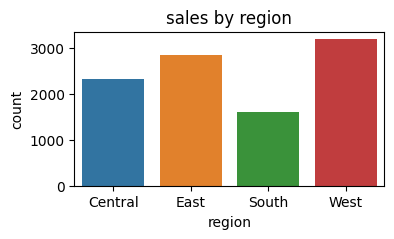

In [71]:
plt.figure(figsize=(4,2))
sns.countplot(data=dataset,x="region",hue="region")
plt.title("sales by region")
plt.show()

# segment(customer type)

In [76]:
dataset["segment"].value_counts()

segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [79]:
x=dataset["segment"].value_counts().index
y=dataset["segment"].value_counts().values

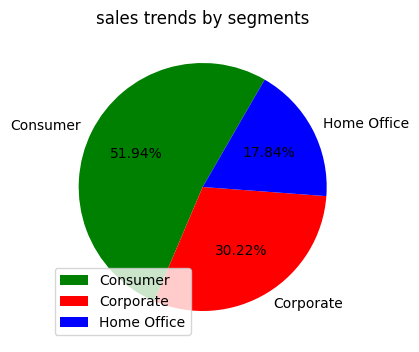

In [94]:
plt.figure(figsize=(4,5))
p=["green","red","blue"]
plt.pie(y,labels=x,startangle=60,colors=p,autopct="%0.2f%%")
plt.title("sales trends by segments")
plt.legend(loc=3)
plt.show()

# category

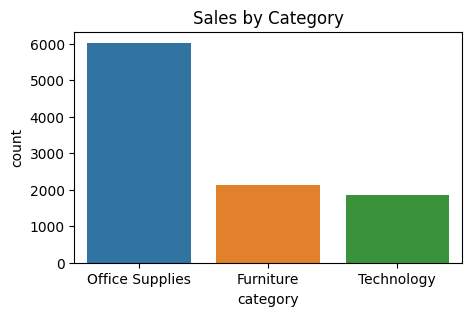

In [113]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset,x="subcategory",hue="category")
plt.title("Sales by Category")
plt.show()

# subcategory

In [116]:
dataset["subcategory"].value_counts().values

array([1523, 1370,  957,  889,  846,  796,  775,  617,  466,  364,  319,
        254,  228,  217,  190,  115,   68], dtype=int64)

In [ ]:
# for only office supplies

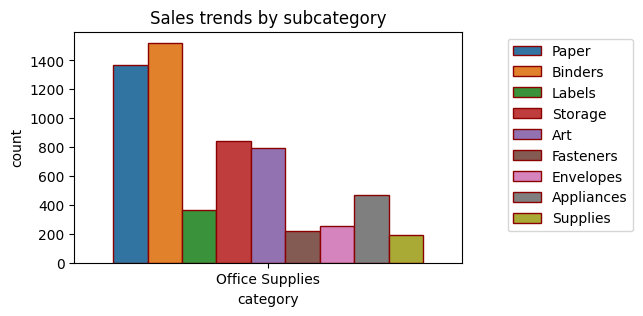

In [218]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset[dataset["category"]== "Office Supplies"],
              hue="subcategory",x="category",edgecolor="darkred")
plt.legend(bbox_to_anchor=(1.1,1))
plt.title("Sales trends by subcategory")
plt.show()

# Category and Region

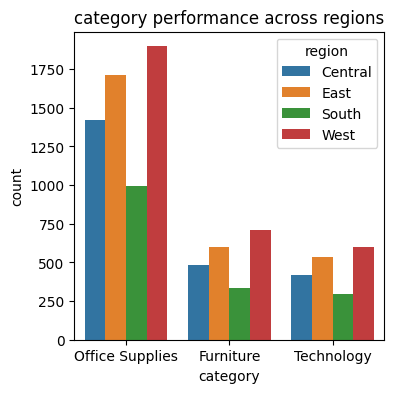

In [103]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset,x="category",hue="region")
plt.title("category performance across regions")
plt.show()

# by year

In [148]:
dataset["orderyear"].value_counts()

orderyear
2022    3312
2021    2587
2020    2102
2019    1993
Name: count, dtype: int64

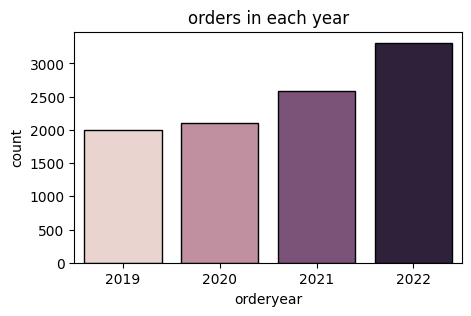

In [235]:
plt.figure(figsize=(5,3))
sns.countplot(dataset,x="orderyear",hue="orderyear",legend=False,edgecolor="black")

plt.title("orders in each year")
plt.show()

# profit 

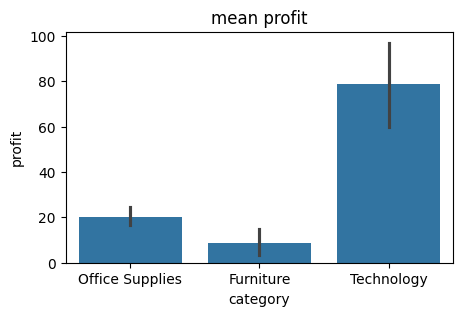

In [213]:
plt.figure(figsize=(5,3))
sns.barplot(data=dataset,x="category",y="profit") #meab profit(by default)

plt.title("mean profit")
plt.show()

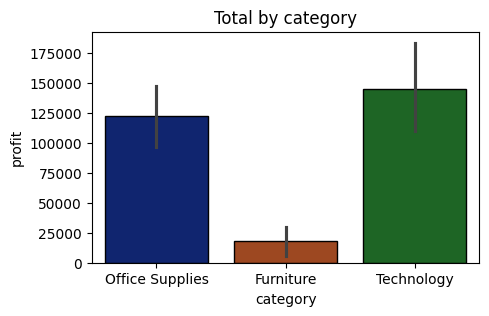

In [212]:
plt.figure(figsize=(5,3))
sns.barplot(data=dataset,x="category",y="profit",estimator='sum',
            hue="category",palette="dark",edgecolor="black")

plt.title("Total by category")
plt.show()

# statewise

In [180]:
dataset["state"].value_counts().head(5)

state
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

In [184]:
x=dataset["state"].value_counts().head(5).index
y=dataset["state"].value_counts().head(5).values

In [199]:
t=["red","blue","green","pink","skyblue"]

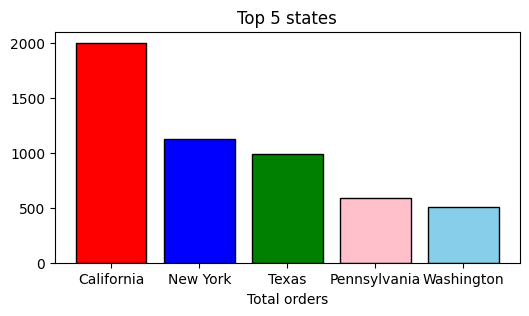

In [236]:
plt.figure(figsize=(6,3))
plt.bar(x,y,color=t,edgecolor="black")
plt.xlabel("Total orders")
plt.title("Top 5 states")
plt.show()